In [1]:
import pandas as pd
from matplotlib import pyplot as plt

TOTAL_MODELS = 1777547

path = "data/from_MARS/average_pLDDT.csv"
path = "data/from_MARS/pLDDT_stats.csv"
path = "data/from_MARS/pLDDT_stats_plus.csv"

In [2]:
df = pd.read_csv(
    path,
    names=("fn",
            "mean",
            "median",
            "stdev",
            "var",
            "max",
            "min",
            "perc_confident"
    )
)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

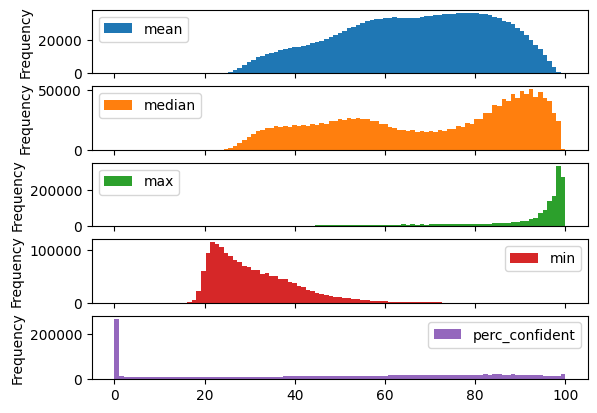

In [3]:
df[["mean", "median", "max", "min" , "perc_confident"]].plot(kind="hist", subplots=True, bins=99)

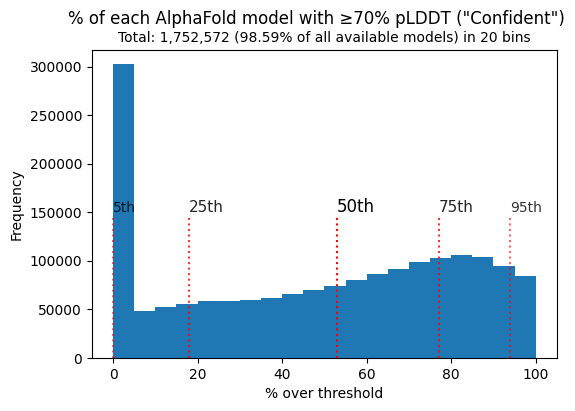

In [4]:
fig, ax = plt.subplots(figsize = (6,4))

pc = df["perc_confident"]
pc.plot(kind="hist", bins=20)
quant_5, quant_25, quant_50, quant_75, quant_95 = pc.quantile(0.05), pc.quantile(0.25), pc.quantile(0.5), pc.quantile(0.75), pc.quantile(0.95)

# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.46], [quant_25, 0.8, 0.46], [quant_50, 1, 0.46],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.46]]

# # Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color="red")
ax.text(quant_5, 150000, "5th", size = 10, alpha = 0.8)
ax.text(quant_25, 150000, "25th", size = 11, alpha = 0.85)
ax.text(quant_50, 150000, "50th", size = 12, alpha = 1)
ax.text(quant_75, 150000, "75th", size = 11, alpha = 0.85)
ax.text(quant_95, 150000, "95th", size = 10, alpha =.8)
ax.set_xlabel("% over threshold")
plt.suptitle("% of each AlphaFold model with \u226570% pLDDT (\"Confident\")")
plt.title(
    "Total: {:,} ({}% of all available models) in 20 bins".format(len(df), round(100*len(df)/1777547, 2)),
    fontsize=10)
plt.show()


In [5]:
no_confidence = len(df[df["perc_confident"] == 0])
print("Models with no \"confident\" residues: {:,} ({}%)".format(no_confidence, round(100 * no_confidence / len(df), 2)))
majority_confidence = len(df[df["perc_confident"] > 50])
print("Models with majority \"confident\" residues: {:,} ({}%)".format(majority_confidence, round(100 * majority_confidence / len(df), 2)))
total_confidence = len(df[df["perc_confident"] == 100])
print("Models with all \"confident\" residues: {:,} ({}%)".format(total_confidence, round(100 * total_confidence / len(df), 2)))

Models with no "confident" residues: 250,714 (14.31%)
Models with majority "confident" residues: 906,728 (51.74%)
Models with all "confident" residues: 9,748 (0.56%)


mean                 Axes(0.125,0.11;0.0945122x0.77)
median            Axes(0.238415,0.11;0.0945122x0.77)
stdev             Axes(0.351829,0.11;0.0945122x0.77)
var               Axes(0.465244,0.11;0.0945122x0.77)
max               Axes(0.578659,0.11;0.0945122x0.77)
min               Axes(0.692073,0.11;0.0945122x0.77)
perc_confident    Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

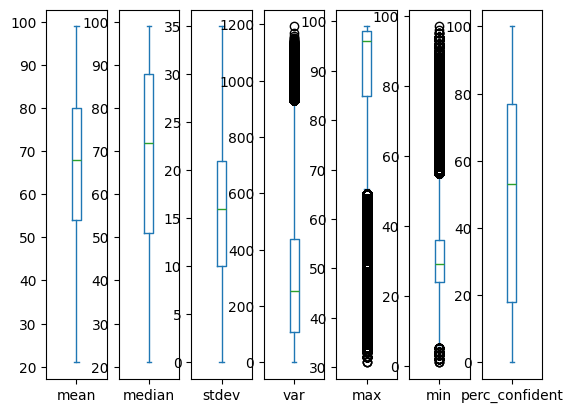

In [6]:
df.plot(kind="box", subplots=True)

In [7]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:,})'.format(pct, v=val)
    return my_format

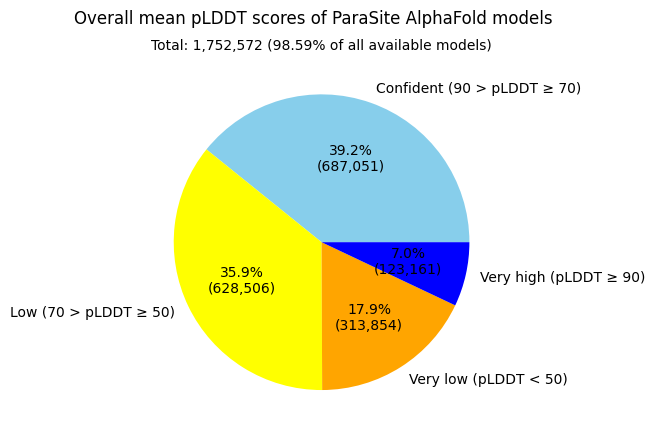

In [8]:
label = "mean"
df["overall_confidence"] = ""
df.loc[df[label] < 50, "overall_confidence"] = "Very Low"
df.loc[(df[label] >= 50) & (df[label] < 70), "overall_confidence"] = "Low"
df.loc[(df[label] >= 70) & (df[label] < 90), "overall_confidence"] = "Confident"
df.loc[df[label] >= 90, "overall_confidence"] = "Very High"

s = df.overall_confidence.value_counts()
fig, ax = plt.subplots()
colors = {
    "Very High": "blue",
    "Confident": "skyblue",
    "Low": "yellow",
    "Very Low": "orange"
}
labels = {
    "Very High": "Very high (pLDDT \u2265 90)",
    "Confident": "Confident (90 > pLDDT \u2265 70)",
    "Low": "Low (70 > pLDDT \u2265 50)",
    "Very Low": "Very low (pLDDT < 50)"
}
ax.pie(s,
    labels=[labels[key] for key in s.index],
    autopct=autopct_format(s),
    colors=[colors[key] for key in s.index],
)
plt.suptitle("Overall {} pLDDT scores of ParaSite AlphaFold models".format(label, len(df)))
plt.title(
    "Total: {:,} ({}% of all available models)".format(len(df), round(100*len(df)/TOTAL_MODELS, 2)),
    fontsize=10)
plt.show()

In [9]:
df.sort_values("mean")

,fn,mean,median,stdev,var,max,min,perc_confident,overall_confidence
557053,AF-A0A0B2VL62-F1-model_v4.pdb,21,21,3,11,45,17,0,Very Low
1585535,AF-A0A0V0Y800-F1-model_v4.pdb,22,22,3,8,33,17,0,Very Low
392161,AF-A0A0V1FE13-F1-model_v4.pdb,22,22,3,7,34,18,0,Very Low
707030,AF-A0A0V0WUI9-F1-model_v4.pdb,23,23,3,7,35,18,0,Very Low
594082,AF-A0A1I8HBC5-F1-model_v4.pdb,23,22,3,12,50,18,0,Very Low
...,...,...,...,...,...,...,...,...,...
1016736,AF-A0A3P6U2L4-F1-model_v4.pdb,98,98,1,2,99,88,100,Very High
1103783,AF-A0A1I7Y6Z7-F1-model_v4.pdb,98,98,3,10,99,63,99,Very High
201108,AF-G0PJP7-F1-model_v4.pdb,98,99,3,11,99,55,100,Very High
1389639,AF-G4VDR4-F1-model_v4.pdb,98,99,2,5,99,73,100,Very High


In [30]:
df[(df["mean"] < 50) & (df["mean"] >= 20)].sort_values("mean").sample(100)["fn"].str.split('-').str[1].to_csv("data/100_poor_af_models.txt", index=False, header=False)